# Step 0:

Hi.

The purpose of this notebook is to show how we can take EAZY's fits and use it to find the full SFHs.

This works because SED fitting is just counting up stellar contributions to flux. All the stars (with their multitude of ages) contribute flux to the spectra. Thus the spectra is telling you about the galaxy's SFH, but in a hidden way, and SED fitting is all about uncovering it.

I know the full SFHs of each of my templates, so if I add up the respective SFHs of each template (with the scaling from the fitting), then I can get the predicted SFH.

As for this tutorial, I'm going to use the Hainline et al. data like in the paper. The goal is really to get some figures in the paper.

In [1]:
# IMPORTS (yay)
import numpy as np
import matplotlib.pyplot as plt

import astropy.units as u

import ares

import eazy

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# add eazycode path for ease
import warnings

import os

%env EAZYCODE=/Users/judahluberto/python_packages/eazy-py/eazy-photoz

env: EAZYCODE=/Users/judahluberto/python_packages/eazy-py/eazy-photoz


# Step 1: Run EAZY:

Of course, first we must run the Hainline data in EAZY. This gets us the linear-fitting coefficients (how much each template galaxy's spectra must be scaled to look like the inputted galaxy), which are what we need for the SFH! :D 

Setup:

In [3]:
params = {}

# paths and such and stuff
# which I need to use for EAZY

# CHANGE THIS FILE BELOW IF YOU WANT TO DO IT WITH OTHER DATASETS
params['CATALOG_FILE'] = '/Users/judahluberto/hainline_2023_highz_changed.csv'

params['FILTERS_RES'] = '/Users/judahluberto/python_packages/eazy-py/eazy-photoz/filters/FILTER.RES.latest'

params['MAIN_OUTPUT_FILE'] = '/Users/judahluberto/python_packages/eazy-py/eazy/outputs'

# igm absorption
params['APPLY_IGM'] = True

# z (NOTE: I am doing z_step = 0.1, which aligns with the templates, to avoid issues with the SFH creation)
# if the steps do not match the template set, I run into issues where z_phot ~ z where template gal starts SF
params['Z_STEP'] = 0.1
params['Z_MIN'] = 1
params['Z_MAX'] = 20.
params['Z_STEP_TYPE'] = 0

# making sure there is a constant prior in the P(z)
params['PRIOR_ABZP'] = 23.9
params['PRIOR_FILE'] = '/Users/judahluberto/constant_prior.txt'
params['PRIOR_FILTER'] = 375

# I don't want EAZY to tell me everything
params['VERBOSITY'] = 0

# the template file

# CHANGE THIS IF YOU WANT A DIFFERENT TEMPLATE SET (e.g. THE LYA VERSION)
params['TEMPLATES_FILE'] = 'templates/ARES_burst_prior_NO_LYA/ARES.param'
params['WAVELENGTH_FILE'] = 'templates/ARES_burst_prior_NO_LYA/wavelengths.def'

# template error
params['TEMP_ERR_FILE'] = 'templates/template_error_cosmos2020.txt'

In [4]:
# so eazy can translate the filters
translate_file = os.path.join(os.getenv('EAZYCODE'), 'inputs/zphot.translate')

In [5]:
# create EAZY instance
# which creates the tempfilt array, explained in the README of the repo
without_lya = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_file, zeropoint_file=None, 
                          params=params, load_prior=True, load_products=False)

Read default param file: /Users/judahluberto/opt/anaconda3/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: /Users/judahluberto/hainline_2023_highz_changed.csv
   >>> NOBJ = 715
f_f606w e_f606w ( 14): hst/wfpc2_f606w.dat
f_f814w e_f814w ( 16): hst/wfpc2_f814w.dat
f_f444w e_f444w (377): jwst_nircam_f444w
f_f200w e_f200w (366): jwst_nircam_f200w
f_f356w e_f356w (376): jwst_nircam_f356w
f_f277w e_f277w (375): jwst_nircam_f277w
f_f070w e_f070w (362): jwst_nircam_f070w
f_f115w e_f115w (364): jwst_nircam_f115w
f_f090w e_f090w (350): jwst_niriss_f090w
f_f150w e_f150w (365): jwst_nircam_f150w
f_f410m e_f410m (383): jwst_nircam_f410m
f_f182m e_f182m (370): jwst_nircam_f182m
f_f210m e_f210m (271): RestUV/Tophat_1700_200.dat
f_f335m e_f335m (381): jwst_nircam_f335m
f_f430m e_f430m (384): jwst_nircam_f430m
f_f435w e_f435w (233): hst/ACS_update_sep07/wfc_f435w_t81.dat
f_f775w e_f775w (216): hst/wfc3/UVIS/f775w.dat
f_f850lp e_f850lp ( 17): hst/wfpc2_f850lp.dat
Read PRIOR_

  0%|                                                    | 0/26 [00:00<?, ?it/s]<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C head

Template   0: ARES_index=25.fits (NZ=131).
Template   1: ARES_index=50.fits (NZ=131).
Template   2: ARES_index=75.fits (NZ=131).
Template   3: ARES_index=100.fits (NZ=131).
Template   4: ARES_index=150.fits (NZ=131).
Template   5: ARES_index=200.fits (NZ=131).
Template   6: ARES_index=250.fits (NZ=131).
Template   7: ARES_index=300.fits (NZ=131).
Template   8: ARES_index=350.fits (NZ=131).
Template   9: ARES_index=400.fits (NZ=131).
Template  10: ARES_index=500.fits (NZ=131).
Template  11: ARES_index=600.fits (NZ=131).
Template  12: ARES_index=700.fits (NZ=131).
Template  13: ARES_index=25_burst.fits (NZ=131).
Template  14: ARES_index=50_burst.fits (NZ=131).
Template  15: ARES_index=75_burst.fits (NZ=131).
Template  16: ARES_index=100_burst.fits (NZ=131).
Template  17: ARES_index=150_burst.fits (NZ=131).
Template  18: ARES_index=200_burst.fits (NZ=131).
Template  19: ARES_index=250_burst.fits (NZ=131).
Template  20: ARES_index=300_burst.fits (NZ=131).
Template  21: ARES_index=350_burst

190it [00:00, 5959.82it/s]


In [6]:
# Full catalog
without_lya.set_sys_err(positive=True)
sample = np.isfinite(without_lya.ZSPEC)

# perform the fits!
without_lya.fit_catalog(without_lya.idx[sample], n_proc=8)

  0%|                                                   | 0/190 [00:00<?, ?it/s]<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C head

Compute best fits
fit_best: 0.8 s (n_proc=1,  NOBJ=714)
Fit 16.2 s (n_proc=8, NOBJ=715)


In [7]:
# get the parameters I want
# I pulled this from an EAZY demo...
warnings.simplefilter('ignore', category=RuntimeWarning)

zout_without_lya, hdu = without_lya.standard_output(simple=False, 
                                 rf_pad_width=0.5, rf_max_err=2, 
                                 prior=True, beta_prior=True, 
                                 absmag_filters=[], 
                                 extra_rf_filters=[],
                                 template_fnu_units=u.Lsun/u.Hz)

fit_best: 0.7 s (n_proc=1,  NOBJ=714)


100%|████████████████████████████████████████| 714/714 [00:03<00:00, 208.05it/s]


# Step 2: Setup post EAZY

These files are in the repo.

In [8]:
# files of the SFHs and stellar masses OF THE TEMPLATES (in order)
sfhs = np.loadtxt('ares_sfhs.txt')
stellarmasses = np.loadtxt('ares_stellarmasses.txt')

# the redshifts and times native in ARES
# technically we can get these from our ARES instance below,
# but we might as well do it now too
redshifts = np.loadtxt('ares_z.txt')
times = np.loadtxt('ares_t.txt')

# what the redshifts are in my z-dependent template set
redshifts_temps = np.arange(6, 19.5, 0.1)[::-1]

temps_zi = [abs(redshifts - i).argmin() for i in redshifts_temps]
times_temps = times[temps_zi]

# percent max burst
# max_burst = 1 here by the weird way I defined this
max_burst = 1

# time since the start of the burst
time_since = 10 # Myr

Create an ARES instance.

In [9]:
# setup
pars = ares.util.ParameterBundle('mirocha2020:univ')

# extra parameters in ARES...
pars['popa_nebular'] = True
pars['pop_nebular_lines'] = 1 # Can be 1, 2, or 3 (3 and 'inoue2011' equivalent)
pars['pop_nebular_lookup'] = 'ferland1980' # Need this for some coefficients
pars['tau_clumpy'] = 2  # Can be 1, 2, or 'madau1995' -- makes this high-z specific

# no mass accretion rate (MAR) scatter...the burst handles any scatter from the SFH line
pars['pop_scatter_mar'] = 0

# make the instance
pop = ares.populations.GalaxyPopulation(**pars)  

Make the shape of the burst; a sharp pop up followed by an exponential decrease:

In [10]:
# just makes it 
def exp_burst(t, t0, tau):
    return np.exp((t - t0) / tau)

In [11]:
# get burst info within ARES
tab_sed = pop.src.tab_sed.T # erg/s/A/Msun
tab_waves_c = pop.src.tab_waves_c # Angstroms
tab_t = pop.src.tab_t # Myr

# i'm adding a time here to make this compatible with later arrays
times_added = np.array([0.8] + list(tab_t))
times_added = times_added[times_added <= time_since][:-1]

small_times = tab_t[tab_t <= time_since]

# Loaded $ARES/bpass_v1/SEDS/sed.bpass.instant.nocont.sin.z004.deg10


In [12]:
# times between bursts (need to know to make the mass of the burst unity)
delta_t = small_times - times_added

In [13]:
# make the burst
points = exp_burst(small_times, time_since, 1)
points_with_zero = np.array([0] + list(points[:-1]))
sf_burst = points * delta_t

burst_add = sf_burst / (np.sum(sf_burst) * 1e6) #1e6 turns Myr to yr (time spacing in ARES in Myr)
burst_add = burst_add[::-1] # to flip to correct orientation

EAZY doesn't give us the components of the linear fit in a physical way, so we must convert them to something physical (so that we can multiply each SFH by its respective value):

In [14]:
cosmology = ares.physics.Cosmology()

def calc_to_physical(eazyinstance, gal):
    # I need the luminosity distance
    dL = cosmology.LuminosityDistance(eazyinstance.zbest[gal]) * u.cm

    # and also to convert between units
    fnu_units = u.erg/u.s/u.cm**2/u.Hz
    uJy_to_cgs = u.microJansky.to(u.erg/u.s/u.cm**2/u.Hz)

    fnu_scl = 10**(-0.4*(23.9-23.9))*uJy_to_cgs

    to_physical = fnu_scl*fnu_units*4*np.pi*dL**2/(1+eazyinstance.zbest[gal])
    to_physical /= (1*u.Lsun/u.Hz).to(u.erg/u.second/u.Hz)
    
    return to_physical

Another function which adds some amount of burst to the native SFHs in EAZY at 5 Myr before observation. I need to do this for each object because the burst is always 10 Myr before observation, and each object is observed at a different spot.

So I add the burst to the ARES template SFHs for our "set" which has the burst component (explained more in the paper).

In [15]:
# a function to get the burst SFHs in a way that I want!
def burst_sfhs(zbest_i, burst_t_i):
    # multiplicative factor for burst for each ARES gal
    burst_amounts = stellarmasses[:, zbest_i] * max_burst
    
    # get the burst contributions for each ARES gal
    burst_array = np.tile(burst_add, (stellarmasses.shape[0], 1)) * burst_amounts[:, np.newaxis]
    
    # add to the sfhs for each ARES gal
    sfhs_copy = sfhs.copy()
    
    sfhs_copy[:, burst_t_i:zbest_i+1] += burst_array
    
    return sfhs_copy

# Step 3: Find the full SFH for ONE object.

Might as well take this in baby steps. Do one. Then many.

In [16]:
# choose an object (i am choosing this randomly)
index = 300
gal = zout_without_lya['id'][index]
    
# get its fit redshift
z_ml = zout_without_lya[index]['z_ml']
z_ml_rounded = round(z_ml, 1)

# get the full SFH array including the burst

# create new sfh and stellarmass arrays including the burst
# index info
zbest_i = abs(redshifts - z_ml_rounded).argmin()
burst_t_i = abs(times[zbest_i] - round(time_since) - times).argmin()

# sfh adding (confusingly named)
sfhs_with_burst = burst_sfhs(zbest_i, burst_t_i)

sfh_comb = np.vstack([sfhs, sfhs_with_burst])

# get its SFH
thefit = without_lya.show_fit(gal, get_spec=True)
id_offit = thefit['id']
coeffs = thefit['coeffs']
sfh_fit = np.array([sfh_comb[index] * coeffs[index] for index, value in enumerate(sfh_comb)])

# normalize the SFH to a physical value
# as EAZY does not give us the physical values
to_physical = calc_to_physical(without_lya, index)

sfh_fit *= to_physical

# sum up the sfhs  
sfh_fit_sum = np.sum(sfh_fit, axis=0)

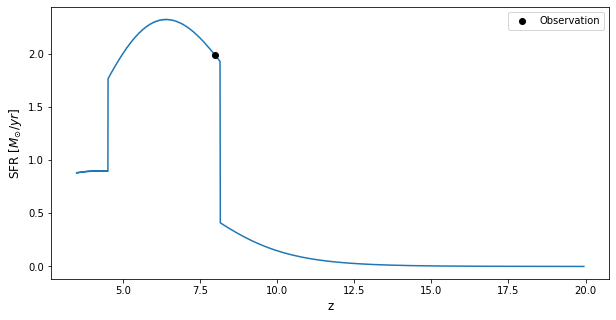

In [17]:
# plot it!
plt.figure(figsize=(10, 5))

# SFH itself
plt.plot(redshifts, sfh_fit_sum)

# place of obs
plt.scatter(redshifts[zbest_i], sfh_fit_sum[zbest_i], c='black', label='Observation', zorder=100)

plt.ylabel(r'SFR [$M_{\odot} / yr$]', fontsize=12)
plt.xlabel('z', fontsize=12)

plt.legend()

plt.show()

# Step 4: Get the full SFHs and stellar mass growth histories.

In [18]:
zbest = without_lya.zbest

# I am grabbing a thousand different things here
# and splitting between 8 < z < 10, 10 < z < 12, and z > 12
# which is why I have a lot of random arrays
mass_hist_low_8_to_10 = list()
mass_hist_mid_8_to_10 = list()
mass_hist_high_8_to_10 = list()

mass_low_8_to_10 = list()
mass_mid_8_to_10 = list()
mass_high_8_to_10 = list()

times_low_8_to_10 = list()
times_mid_8_to_10 = list()
times_high_8_to_10 = list()

mass_norm_low_8_to_10 = list()
mass_norm_mid_8_to_10 = list()
mass_norm_high_8_to_10 = list()

zbest_low_8_to_10 = list()
zbest_mid_8_to_10 = list()
zbest_high_8_to_10 = list()

is_low_mass_8_to_10 = list()
is_mid_mass_8_to_10 = list()
is_high_mass_8_to_10 = list()

mass_hist_low_10_to_12 = list()
mass_hist_mid_10_to_12 = list()
mass_hist_high_10_to_12 = list()

mass_low_10_to_12 = list()
mass_mid_10_to_12 = list()
mass_high_10_to_12 = list()

times_low_10_to_12 = list()
times_mid_10_to_12 = list()
times_high_10_to_12 = list()

mass_norm_low_10_to_12 = list()
mass_norm_mid_10_to_12 = list()
mass_norm_high_10_to_12 = list()

zbest_low_10_to_12 = list()
zbest_mid_10_to_12 = list()
zbest_high_10_to_12 = list()

is_low_mass_10_to_12 = list()
is_mid_mass_10_to_12 = list()
is_high_mass_10_to_12 = list()

# iterating through each object in the list
mass_contributions = list()
for index, gal in enumerate(zout_without_lya['id']):
    # skip instances the z > 19 because it runs into the edge of ARES
    # and outputs incorrect stuff
    if zout_without_lya['z_ml'][index] > 19:
        continue
    
    # get its fit redshift
    z_ml = zout_without_lya[index]['z_ml']
    z_ml_rounded = round(z_ml, 1)
    
    # get the full SFH array including the burst
    
    # create new sfh and stellarmass arrays including the burst
    # index info
    zbest_i = abs(redshifts - z_ml_rounded).argmin()
    burst_t_i = abs(times[zbest_i] - round(time_since) - times).argmin()
    
    # sfh adding (confusingly named)
    sfhs_with_burst = burst_sfhs(zbest_i, burst_t_i)
    
    sfh_comb = np.vstack([sfhs, sfhs_with_burst])

    # get its SFH
    thefit = without_lya.show_fit(gal, get_spec=True)
    id_offit = thefit['id']
    coeffs = thefit['coeffs']
    sfh_fit = np.array([sfh_comb[index] * coeffs[index] for index, value in enumerate(sfh_comb)])

    # normalize the SFH to a physical value
    # as EAZY does not give us the physical values
    to_physical = calc_to_physical(without_lya, index)
    
    sfh_fit *= to_physical
    
    # sum up the sfhs  
    sfh_fit_sum = np.sum(sfh_fit, axis=0)
    
    # add the stellar mass growth history
    ms_fit = np.cumsum(sfh_fit, axis=1) * u.Myr.to(u.yr) * (1 - pop.pf['pop_mass_yield'])
    
    ms_fit_sum = np.sum(ms_fit, axis=0)
    
    ms_comb = np.cumsum(sfh_comb, axis=1)[:, zbest_i + 10] * u.Myr.to(u.yr) * (1 - pop.pf['pop_mass_yield'])
    
    # mass at the point
    ms_fit_sum_val = ms_fit_sum[zbest_i]
    
    # now that I've set up getting the SFH and the stellar mass history,
    # here I'll find the weighted average mass of the templates
    phys_coeffs = coeffs * to_physical
    
    # save mass contributions
    ratio = phys_coeffs * ms_comb / ms_fit_sum_val
    
    mass_cont = np.sum(ratio * ms_comb)
    
    mass_contributions.append([mass_cont.value, ms_fit_sum_val])
    
    # get stellar mass histories normalized to the time of observation
    time_start = times[zbest_i] - times
    
    # create an array to normalize time of observation
    mass_array_norm = np.full(len(redshifts), 0)
    
    mass_array_norm[:zbest_i] = ms_fit_sum[:zbest_i][::-1]
    
    # divide the masses up and do the appends (all of them!! :D ) 
    if np.any((z_ml_rounded > 8) & (z_ml_rounded < 9)) & np.any((ms_fit_sum_val < 5e7)):
        mass_hist_low_8_to_10.append(ms_fit_sum)
        mass_low_8_to_10.append(ms_fit_sum_val)
        
        times_low_8_to_10.append(time_start)
        
        mass_norm_low_8_to_10.append(mass_array_norm)
        
        zbest_low_8_to_10.append(z_ml_rounded)
        
        is_low_mass_8_to_10.append(index)
    
    if np.any((z_ml_rounded > 8) & (z_ml_rounded < 9)) & np.any((ms_fit_sum_val > 5e7) & (ms_fit_sum_val < 5e8)):
        mass_hist_mid_8_to_10.append(ms_fit_sum)
        mass_mid_8_to_10.append(ms_fit_sum_val)
        
        times_mid_8_to_10.append(time_start)
        
        mass_norm_mid_8_to_10.append(mass_array_norm)
        
        zbest_mid_8_to_10.append(z_ml_rounded)
        
        is_mid_mass_8_to_10.append(index)
        
    if np.any((z_ml_rounded > 8) & (z_ml_rounded < 9)) & np.any((ms_fit_sum_val > 5e8)):
        mass_hist_high_8_to_10.append(ms_fit_sum)
        mass_high_8_to_10.append(ms_fit_sum_val)
        
        times_high_8_to_10.append(time_start)
        
        mass_norm_high_8_to_10.append(mass_array_norm)
        
        zbest_high_8_to_10.append(z_ml_rounded)
        
        is_high_mass_8_to_10.append(index)
        
    if np.any((z_ml_rounded > 10) & (z_ml_rounded < 12)) & np.any((ms_fit_sum_val < 1e7)):
        mass_hist_low_10_to_12.append(ms_fit_sum)
        mass_low_10_to_12.append(ms_fit_sum_val)
        
        times_low_10_to_12.append(time_start)
        
        mass_norm_low_10_to_12.append(mass_array_norm)
        
        zbest_low_10_to_12.append(z_ml_rounded)
        
        is_low_mass_10_to_12.append(index)
        
    if np.any((z_ml_rounded > 10) & (z_ml_rounded < 12)) & np.any((ms_fit_sum_val > 5e7) & (ms_fit_sum_val < 5e8)):
        mass_hist_mid_10_to_12.append(ms_fit_sum)
        mass_mid_10_to_12.append(ms_fit_sum_val)
        
        times_mid_10_to_12.append(time_start)
        
        mass_norm_mid_10_to_12.append(mass_array_norm)
        
        zbest_mid_10_to_12.append(z_ml_rounded)
        
        is_mid_mass_10_to_12.append(index)
        
    if np.any((z_ml_rounded > 10) & (z_ml_rounded < 12)) & np.any((ms_fit_sum_val > 5e8)):
        mass_hist_high_10_to_12.append(ms_fit_sum)
        mass_high_10_to_12.append(ms_fit_sum_val)
        
        times_high_10_to_12.append(time_start)
        
        mass_norm_high_10_to_12.append(mass_array_norm)
        
        zbest_high_10_to_12.append(z_ml_rounded)
        
        is_high_mass_10_to_12.append(index)
        
# change lists to arrays
# I know this is a dumb way to do it, but for the sake of efficiency, whatever
mass_hist_low_8_to_10 = np.array(mass_hist_low_8_to_10)
mass_hist_mid_8_to_10 = np.array(mass_hist_mid_8_to_10)
mass_hist_high_8_to_10 = np.array(mass_hist_high_8_to_10)

times_low_8_to_10 = np.array(times_low_8_to_10)
times_mid_8_to_10 = np.array(times_mid_8_to_10)
times_high_8_to_10 = np.array(times_high_8_to_10)

mass_norm_low_8_to_10 = np.array(mass_norm_low_8_to_10)
mass_norm_mid_8_to_10 = np.array(mass_norm_mid_8_to_10)
mass_norm_high_8_to_10 = np.array(mass_norm_high_8_to_10)

mass_hist_low_10_to_12 = np.array(mass_hist_low_10_to_12)
mass_hist_mid_10_to_12 = np.array(mass_hist_mid_10_to_12)
mass_hist_high_10_to_12 = np.array(mass_hist_high_10_to_12)

times_low_10_to_12 = np.array(times_low_10_to_12)
times_mid_10_to_12 = np.array(times_mid_10_to_12)
times_high_10_to_12 = np.array(times_high_10_to_12)

mass_norm_low_10_to_12 = np.array(mass_norm_low_10_to_12)
mass_norm_mid_10_to_12 = np.array(mass_norm_mid_10_to_12)
mass_norm_high_10_to_12 = np.array(mass_norm_high_10_to_12)

# Step 5: Be happy and plot.

Note that I am plotting the stellar mass growth histories here, rather than the SFHs. I had to compute the SFHs if I wanted to to get the stellar masses, so you can easily use the SFHs as well!! :0 :0 

Let's just plot the 8 < z < 10 stuff:

In [19]:
# get averaged of SFHs
mass_hist_low_8_to_10_avg = np.mean(mass_norm_low_8_to_10, axis=0)
mass_hist_mid_8_to_10_avg = np.mean(mass_norm_mid_8_to_10, axis=0)
mass_hist_high_8_to_10_avg = np.mean(mass_norm_high_8_to_10, axis=0)

mass_hist_low_10_to_12_avg = np.mean(mass_norm_low_10_to_12, axis=0)
mass_hist_mid_10_to_12_avg = np.mean(mass_norm_mid_10_to_12, axis=0)
mass_hist_high_10_to_12_avg = np.mean(mass_norm_high_10_to_12, axis=0)

The low-mass objects (defined in the paper; defined below):

# Loaded $ARES/halos/halo_hist_Tinker10_user_paul_logM_1400_4-18_t_1971_30-2000_xM_10_0.10.hdf5.
# Loaded $ARES/halos/halo_mf_Tinker10_user_paul_logM_1400_4-18_t_1971_30-2000.hdf5.


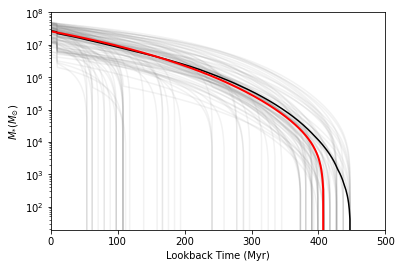

In [20]:
t_norm_array = np.arange(0, len(redshifts))

# plot growth histories of every object
for i in mass_norm_low_8_to_10:
    plt.plot(t_norm_array, i, c='grey', alpha=0.1)
    
# plot average of the growth histories
plt.plot(t_norm_array, mass_hist_low_8_to_10_avg, c='black')

# find ares gal matching average mass of these gals
zi9 = abs(redshifts - np.mean(zbest_low_8_to_10)).argmin()

ares_mass_norm = np.full(len(redshifts), np.nan)

which_ares_gal = abs(pop.histories['Ms'][:, zi9] - np.median(mass_low_8_to_10)).argmin()

ares_mass_norm[:zi9] = pop.histories['Ms'][which_ares_gal][:zi9][::-1]

# now to do the plotting itself
plt.plot(t_norm_array, ares_mass_norm, c='red', linewidth=2)   

# random plotting stuff
plt.xlim(0, 500)

plt.yscale('log')

plt.ylabel(r'$M_{*} (M_{\odot})$')
plt.xlabel(r'Lookback Time (Myr)')

plt.show()

The "mid"-mass objects:

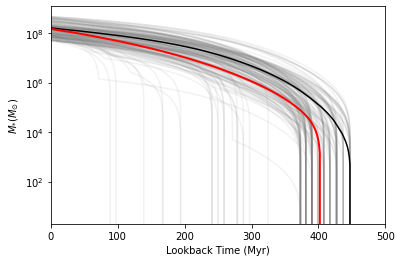

In [21]:
t_norm_array = np.arange(0, len(redshifts))

# plot growth histories
for i in mass_norm_mid_8_to_10:
    plt.plot(t_norm_array, i, c='grey', alpha=0.1)
    
# plot average of the growth histories
plt.plot(t_norm_array, mass_hist_mid_8_to_10_avg, c='black')

# find ares gal matching average mass of these gals
zi9 = abs(redshifts - np.mean(zbest_mid_8_to_10)).argmin()

ares_mass_norm = np.full(len(redshifts), np.nan)

which_ares_gal = abs(pop.histories['Ms'][:, zi9] - np.mean(mass_mid_8_to_10)).argmin()

ares_mass_norm[:zi9] = pop.histories['Ms'][which_ares_gal][:zi9][::-1]

plt.plot(t_norm_array, ares_mass_norm, c='red', linewidth=2)  

plt.xlim(0, 500)

plt.yscale('log')

plt.ylabel(r'$M_{*} (M_{\odot})$')
plt.xlabel(r'Lookback Time (Myr)')

plt.show()

The high-mass objects:

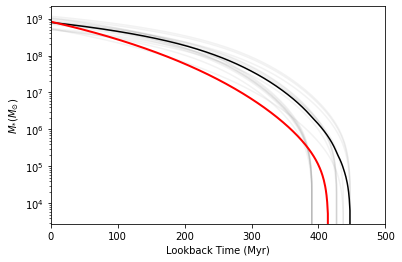

In [22]:
t_norm_array = np.arange(0, len(redshifts))

for i in mass_norm_high_8_to_10:
    plt.plot(t_norm_array, i, c='grey', alpha=0.1)
    
plt.plot(t_norm_array, mass_hist_high_8_to_10_avg, c='black')

# find ares gal matching average mass of these gals
zi9 = abs(redshifts - np.mean(zbest_high_8_to_10)).argmin()

ares_mass_norm = np.full(len(redshifts), np.nan)

which_ares_gal = abs(pop.histories['Ms'][:, zi9] - np.median(mass_high_8_to_10)).argmin()

ares_mass_norm[:zi9] = pop.histories['Ms'][which_ares_gal][:zi9][::-1]

plt.plot(t_norm_array, ares_mass_norm, c='red', linewidth=2)  

plt.xlim(0, 500)

plt.yscale('log')

plt.ylabel(r'$M_{*} (M_{\odot})$')
plt.xlabel(r'Lookback Time (Myr)')

plt.show()

Now all together in harmony!

There may be a way to plot this with less lines, but for the sake of efficiency, I'm more appending the last few cells into one beefy cell to get the plot.

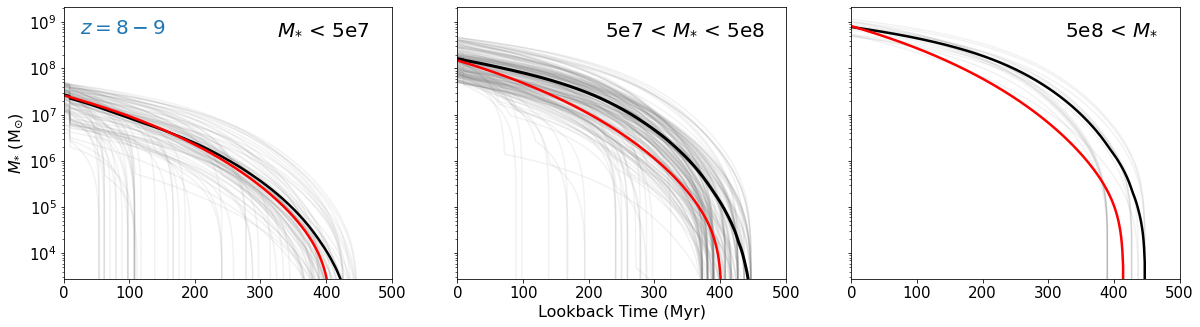

In [23]:
# make one big plot of the SFHs

# setup fig
fig, axs = plt.subplots(ncols=3,figsize=(20,5), sharex=True, sharey=True)

t_norm_array = np.arange(0, len(redshifts))

# plot low mass 

# plot growth histories
for i in mass_norm_low_8_to_10:
    axs[0].plot(t_norm_array, i, c='grey', alpha=0.1)
    
# plot average of the growth histories
axs[0].plot(t_norm_array, mass_hist_low_8_to_10_avg, c='black', linewidth=2.5)

# find ares gal matching average mass of these gals
zi9 = abs(redshifts - np.mean(zbest_low_8_to_10)).argmin()

ares_mass_norm = np.full(len(redshifts), np.nan)

which_ares_gal = abs(pop.histories['Ms'][:, zi9] - np.mean(mass_low_8_to_10)).argmin()

ares_mass_norm[:zi9] = pop.histories['Ms'][which_ares_gal][:zi9][::-1]

axs[0].plot(t_norm_array, ares_mass_norm, c='red', linewidth=2.5)   

# plot mid mass

t_norm_array = np.arange(0, len(redshifts))

# plot growth histories
for i in mass_norm_mid_8_to_10:
    axs[1].plot(t_norm_array, i, c='grey', alpha=0.1)
    
# plot average of the growth histories
axs[1].plot(t_norm_array, mass_hist_mid_8_to_10_avg, c='black', linewidth=3)

# find ares gal matching average mass of these gals
zi9 = abs(redshifts - np.mean(zbest_mid_8_to_10)).argmin()

ares_mass_norm = np.full(len(redshifts), np.nan)

which_ares_gal = abs(pop.histories['Ms'][:, zi9] - np.mean(mass_mid_8_to_10)).argmin()

ares_mass_norm[:zi9] = pop.histories['Ms'][which_ares_gal][:zi9][::-1]

axs[1].plot(t_norm_array, ares_mass_norm, c='red', linewidth=2.5)  

# plot high mass

t_norm_array = np.arange(0, len(redshifts))

for i in mass_norm_high_8_to_10:
    axs[2].plot(t_norm_array, i, c='grey', alpha=0.1)
    
axs[2].plot(t_norm_array, mass_hist_high_8_to_10_avg, c='black', linewidth=2.5)

# find ares gal matching average mass of these gals
zi9 = abs(redshifts - np.mean(zbest_high_8_to_10)).argmin()

ares_mass_norm = np.full(len(redshifts), np.nan)

which_ares_gal = abs(pop.histories['Ms'][:, zi9] - np.mean(mass_high_8_to_10)).argmin()

ares_mass_norm[:zi9] = pop.histories['Ms'][which_ares_gal][:zi9][::-1]

axs[2].plot(t_norm_array, ares_mass_norm, c='red', linewidth=2.5)  

# make limits and labels and such
axs[0].set_xlim(0, 500)
axs[0].set_yscale('log')

axs[0].set_ylabel(r'$M_{*}$ (M$_{\odot})$', fontsize=16)
axs[1].set_xlabel(r'Lookback Time (Myr)', fontsize=16)

axs[0].tick_params(axis='both', which='major', labelsize=15)
axs[1].tick_params(axis='both', which='major', labelsize=15)
axs[2].tick_params(axis='both', which='major', labelsize=15)

axs[0].text(0.65, 0.9, r'$M_{*}$ < 5e7', transform=axs[0].transAxes, fontsize=20)
axs[1].text(0.45, 0.9, r'5e7 < $M_{*}$ < 5e8', transform=axs[1].transAxes, fontsize=20)
axs[2].text(0.65, 0.9, r'5e8 < $M_{*}$', transform=axs[2].transAxes, fontsize=20)

axs[0].text(0.05, 0.9, r'$z = 8 - 9$', c='tab:blue', transform=axs[0].transAxes, fontsize=20)

plt.show()